You will be given two datasets.  Both of these are classic datasets.  The first one is an auto MPG dataset where I would like to predict the mpg based on the other features.  

The second dataset is a telelcom dataset where you have to predict whether the customer is going to churn (leave the telecom company) or not

Linear: https://archive.ics.uci.edu/ml/datasets/Auto+MPG (and attached csv file)

Logistic: This is attached

Required: You will be turning in two files LastName_FirstName_Midterm_Logistic/Linear

Please use Pandas and any Data Viz Libraries at your disposal. I would like to see a full data science project to an extent.  Obviously we are on a short timeframe here but graphs/charts showing the distribution of the data and how the features interact with each other.  I would expect a fully mature model.  Part of the grading will be based on your methodology and your results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_org = pd.read_csv('mpg.csv')

### Explore Data

In [3]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
data_org.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
data_org.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### Address Missing Data

In [6]:
# Check if there is missing data
data_org.isnull().sum() >0

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

No missing data basically.

#### Object Features

In [7]:
data_org['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Change the 'horsepower' type to integer, and change '?' to nan. No information lost.

In [8]:
data_org['horsepower'] = data_org['horsepower'].replace('?',0).astype('int').replace(0,np.nan)

In [9]:
# How many missing data?
data_org['horsepower'].isnull().sum()

6

In [10]:
# Drop nan and store to a new data set. I will use the new data to train at first.
data = data_org.dropna()

#### Continuous Data

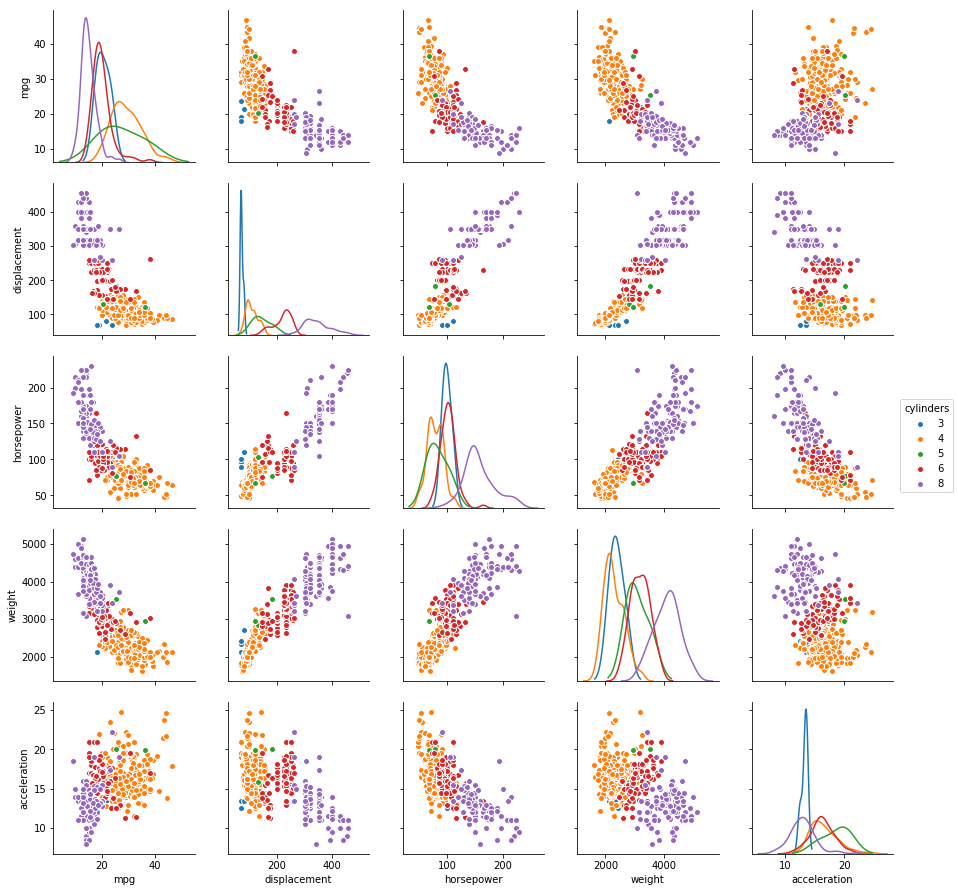

In [11]:
# Plotting pairwise relationships using continuous data only. With parameter 'hue' = 'cylinders'.
sns.pairplot(data, hue ='cylinders',vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'],diag_kind  = 'kde')

#### Categorical Features

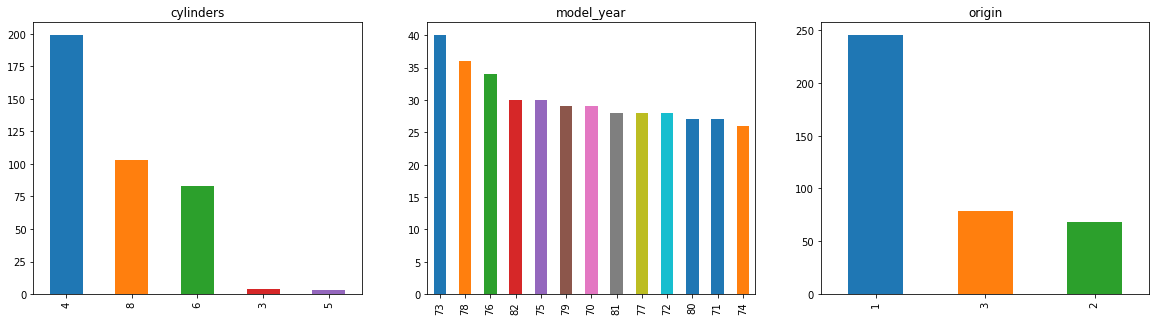

In [12]:
fig = plt.figure(figsize = (20,5))
for a,b in enumerate(['cylinders','model_year','origin']):
    ax = fig.add_subplot(1,3,1+a)
    data[b].value_counts().plot(kind = 'bar',title = b)

In [13]:
data_dummies = pd.get_dummies(data,columns = ['cylinders','model_year','origin'],drop_first = True)
data_dummies.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'name',
       'cylinders_4', 'cylinders_5', 'cylinders_6', 'cylinders_8',
       'model_year_71', 'model_year_72', 'model_year_73', 'model_year_74',
       'model_year_75', 'model_year_76', 'model_year_77', 'model_year_78',
       'model_year_79', 'model_year_80', 'model_year_81', 'model_year_82',
       'origin_2', 'origin_3'],
      dtype='object')

### Training model

#### Split data into training and test set

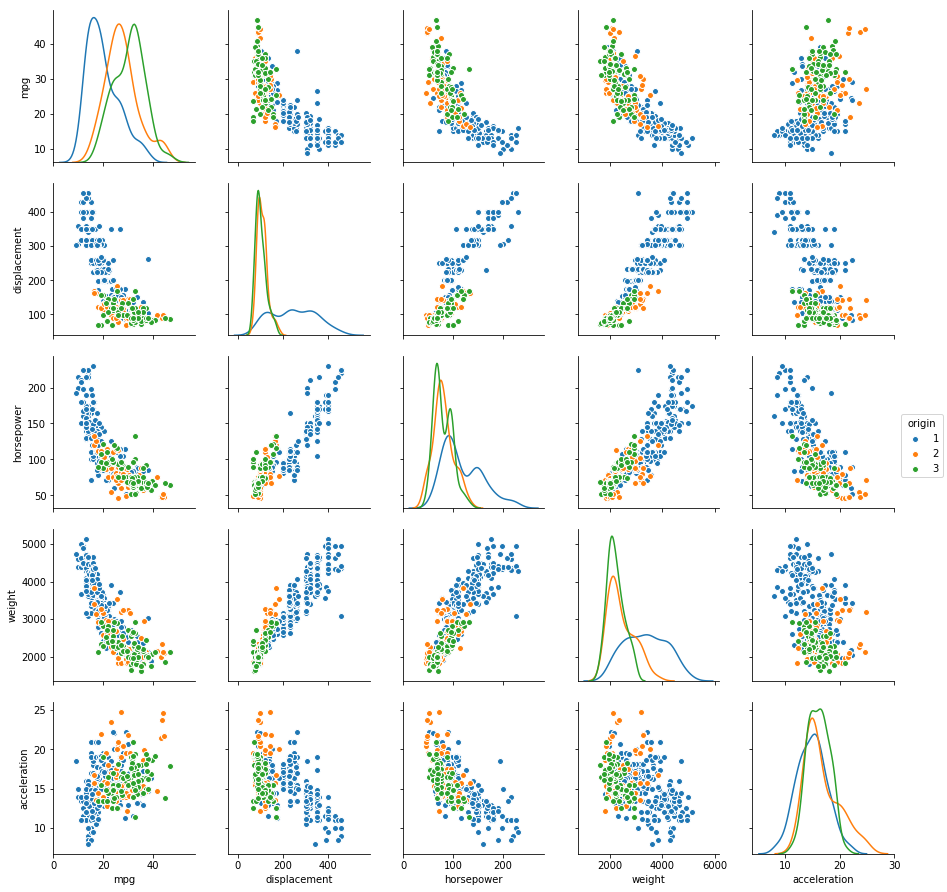

In [14]:
# Stratify is important in this data set.
sns.pairplot(data, hue ='origin',vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'],diag_kind  = 'kde')

I may use split function with stratify 'origin' and 'cylinders' as paremeter.

In [15]:
# Split data 
from sklearn.model_selection import train_test_split

X = data_dummies.drop(['mpg','name'],axis = 1)
y = data_dummies['mpg']

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, stratify=data[['cylinders','origin']], test_size = 0.2, random_state = 20)

#### Data Scale

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### Linear Regression (OSL)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.87


In [18]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
displacement,4.417729
horsepower,-8.890140
weight,-16.962592
acceleration,-0.094279
cylinders_4,5.500080
cylinders_5,5.303252
cylinders_6,3.036297
cylinders_8,5.698304
model_year_71,0.675718
model_year_72,-0.433835


In [19]:
from sklearn.model_selection import cross_val_score

print('Mean cross-validation traing scores(10-fold): {}'.format(cross_val_score(LinearRegression(),X_train,y_train,cv = 10).mean()))
print('Mean cross-validation test scores(10-fold): {}'.format(cross_val_score(LinearRegression(),X_test,y_test,cv = 10).mean()))

Mean cross-validation traing scores(10-fold): 0.8405482014580341
Mean cross-validation test scores(10-fold): 0.7743082677125843


#### Ridge Regression

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha =0.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test))) 

Training set score: 0.87
Test set score: 0.87


In [21]:
# Grid Search with cross validation
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv = 10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
print('Mean cross-validation traing scores(10-fold): {}'.format(cross_val_score(Ridge(alpha = 0.1),X_train,y_train,cv = 10).mean()))
print('Mean cross-validation test scores(10-fold): {}'.format(cross_val_score(Ridge(alpha = 0.1),X_test,y_test,cv = 10).mean()))

Mean cross-validation traing scores(10-fold): 0.8419568679206082
Mean cross-validation test scores(10-fold): 0.8011126869095124


#### Lasso Regression

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test))) 
print('Number of features used: {}'.format(np.sum(lasso.coef_!=0)))

Training set score: 0.53
Test set score: 0.56
Number of features used: 2


In [24]:
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
grid_search = GridSearchCV(Lasso(max_iter = 10000), param_grid, cv = 10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
# With best parameter
lasso = Lasso(alpha = 0.01).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test))) 
print('Number of features used: {}'.format(np.sum(lasso.coef_!=0)))

Training set score: 0.87
Test set score: 0.86
Number of features used: 19


In [26]:
print('Mean cross-validation traing scores(10-fold): {}'.format(cross_val_score(Lasso(alpha = 0.01),X_train,y_train,cv = 10).mean()))
print('Mean cross-validation test scores(10-fold): {}'.format(cross_val_score(Lasso(alpha = 0.01),X_test,y_test,cv = 10).mean()))

Mean cross-validation traing scores(10-fold): 0.8424553556093031
Mean cross-validation test scores(10-fold): 0.7871857313721683


#### Polynomial Regression

In [27]:
# degree 2 with best parameters (selected by grid search)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

polyridge = Ridge(alpha = 1).fit(X_train_poly, y_train)
print('Training set score: {:.2f}'.format(polyridge.score(X_train_poly, y_train)))
print('Test set score: {:.2f}'.format(polyridge.score(X_test_poly, y_test)))

#param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
#grid_search = GridSearchCV(polyridge, param_grid, cv = 10)
#grid_search.fit(X_train_poly, y_train)
#print(grid_search.best_estimator_)

polylasso = Lasso(alpha = 0.01,max_iter = 100000).fit(X_train_poly, y_train)
print('Training set score: {:.2f}'.format(polylasso.score(X_train_poly, y_train)))
print('Test set score: {:.2f}'.format(polylasso.score(X_test_poly, y_test)))

#param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
#grid_search = GridSearchCV(polylasso, param_grid, cv = 10)
#grid_search.fit(X_train_poly, y_train)
#print(grid_search.best_estimator_)

Training set score: 0.93
Test set score: 0.90
Training set score: 0.92
Test set score: 0.90


In [28]:
# degree 3 with best parameters (selected by grid search)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
X_train_poly3 = poly.fit_transform(X_train)
X_test_poly3 = poly.transform(X_test)

polyridge3 = Ridge(alpha = 1).fit(X_train_poly3, y_train)
print('Training set score: {:.2f}'.format(polyridge3.score(X_train_poly3, y_train)))
print('Test set score: {:.2f}'.format(polyridge3.score(X_test_poly3, y_test)))

#param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
#grid_search = GridSearchCV(polyridge, param_grid, cv = 10)
#grid_search.fit(X_train_poly3, y_train)
#print(grid_search.best_estimator_)

polylasso3 = Lasso(alpha = 0.01, max_iter = 10000).fit(X_train_poly3, y_train)
print('Training set score: {:.2f}'.format(polylasso3.score(X_train_poly3, y_train)))
print('Test set score: {:.2f}'.format(polylasso3.score(X_test_poly3, y_test)))

#param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
#grid_search = GridSearchCV(polylasso, param_grid, cv = 10)
#grid_search.fit(X_train_poly3, y_train)
#print(grid_search.best_estimator_)

Training set score: 0.94
Test set score: 0.90
Training set score: 0.92
Test set score: 0.90


In [29]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear').fit(X_train,y_train)
print('Training set score: {:.2f}'.format(svr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(svr.score(X_test, y_test)))

Training set score: 0.83
Test set score: 0.84


For now, I think the best model is polynomial ridge regression with degree of 2. It has high training score (0.93), also good test score (0.90). Even though the scores may a little less than polynomial ridge regression with degree of 3, the degree 2 version has less features so it might be faster.

### Prediction for model

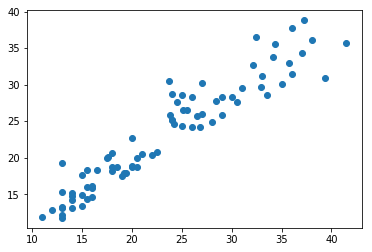

In [30]:
y_pred = polyridge.predict(X_test_poly)
plt.scatter(y_test, y_pred)

#### Residual Histogram

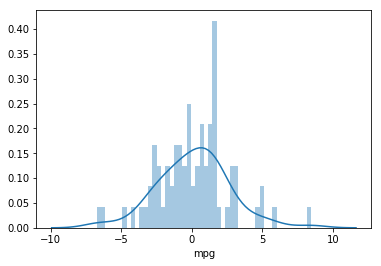

In [31]:
sns.distplot((y_test-y_pred),bins=50);

#### Regression Evaluation Metrics

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.9502652926999355
MSE: 6.476594395302468
RMSE: 2.544915400421489


### Summary

To start, I dealed with missing data, then import dummies instead of categorical data. I drawn the pairplot with different color using two categorical data, which showed there might be some relationship with each categorical data. So I split data using two categorical data (I tried use three of them, but didn't work well, since there was not enought data). After that, I scaled data with MinMaxScaler, and train OLS, Ridge, Lasso, Polynomial Regression. Finally I got a model with 0.93 traing score and 0.90 test score.
Actually I think I can do better when dealing with missing data. I should have used them since there might be some valuable information.